In [46]:
# Step 1: Install (if needed) and import libraries
!pip install seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [47]:
# Step 2: Upload the dataset to Colab
from google.colab import files
uploaded = files.upload()  # Choose your covid_data.csv file when prompted

# Load dataset
df = pd.read_csv("covid_19_data.csv")
df.head()


Saving covid_19_data.csv to covid_19_data (1).csv


,Date,Country,Confirmed,Deaths,Recovered,Active
0,2020-03-01,Pakistan,165,3,145,15
1,2020-03-02,Pakistan,418,8,369,40
2,2020-03-03,Pakistan,661,13,583,63
3,2020-03-04,Pakistan,1074,21,948,103
4,2020-03-05,Pakistan,1209,24,1068,116


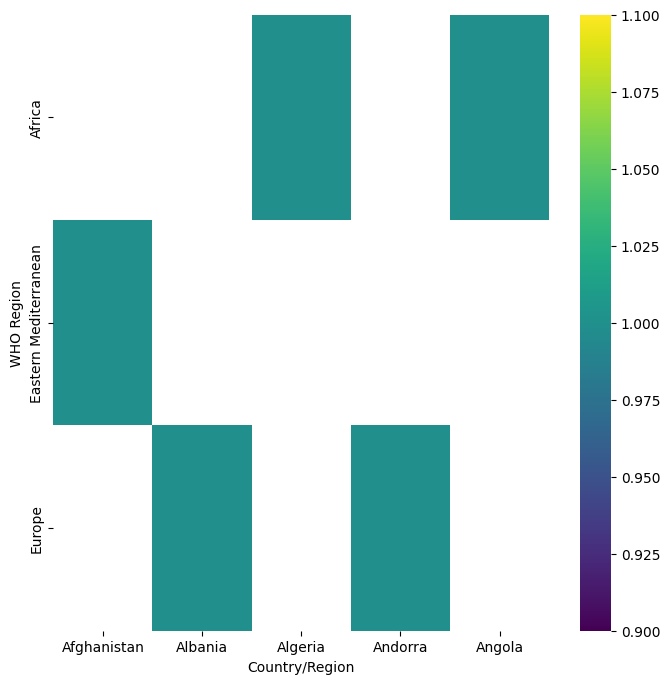

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['WHO Region'].value_counts()
    for x_label, grp in _df_11.groupby('Country/Region')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Country/Region')
_ = plt.ylabel('WHO Region')

In [49]:
# Step 3: Data cleaning
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       500 non-null    datetime64[ns]
 1   Country    500 non-null    object        
 2   Confirmed  500 non-null    int64         
 3   Deaths     500 non-null    int64         
 4   Recovered  500 non-null    int64         
 5   Active     500 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 23.6+ KB


                      Date     Confirmed      Deaths     Recovered  \
count                  500    500.000000  500.000000    500.000000   
mean   2020-04-19 12:00:00  14140.300000  309.366000   9617.838000   
min    2020-03-01 00:00:00     76.000000    2.000000     48.000000   
25%    2020-03-25 18:00:00   6668.250000  142.750000   4498.000000   
50%    2020-04-19 12:00:00  14216.000000  297.500000   9416.500000   
75%    2020-05-14 06:00:00  21479.250000  457.750000  14048.000000   
max    2020-06-08 00:00:00  29071.000000  752.000000  25202.000000   
std                    NaN   8275.373727  195.268132   5954.863425   

             Active  
count    500.000000  
mean    4211.562000  
min       15.000000  
25%     1488.500000  
50%     3489.000000  
75%     6512.500000  
max    13400.000000  
std     3158.057763  


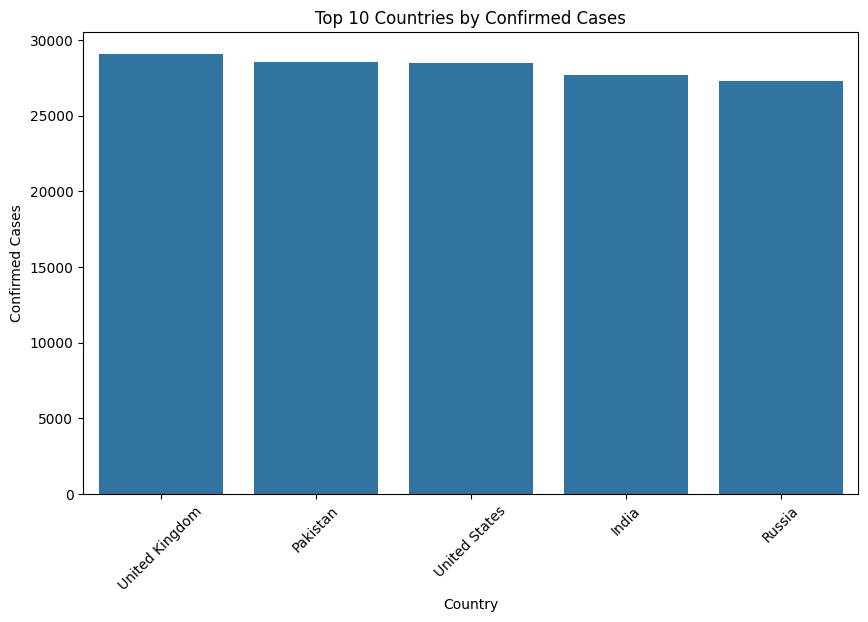

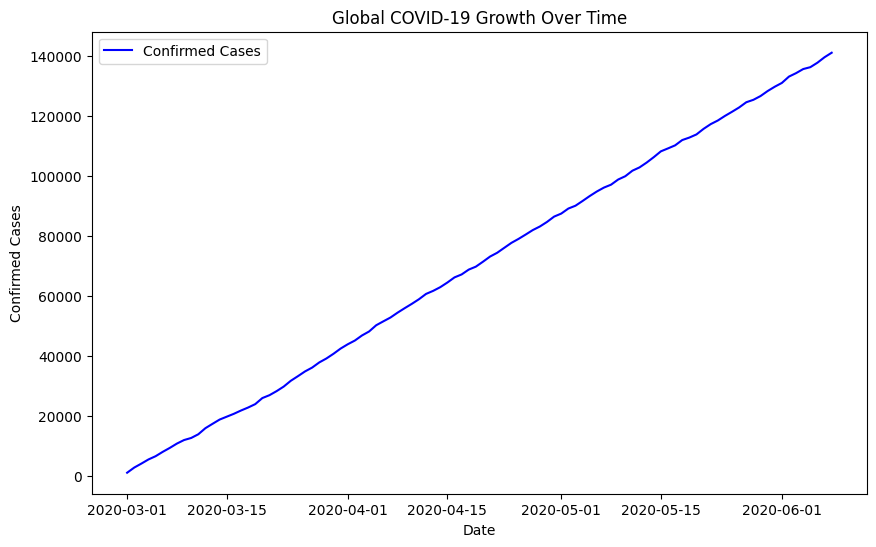

In [50]:
# Step 4: Basic statistics
print(df.describe())

# Top 10 countries by confirmed cases
top_countries = df.groupby('Country')['Confirmed'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries by Confirmed Cases")
plt.xticks(rotation=45)
plt.ylabel("Confirmed Cases")
plt.show()

# Global trend over time
world_data = df.groupby('Date')['Confirmed'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(world_data['Date'], world_data['Confirmed'], label='Confirmed Cases', color='blue')
plt.title("Global COVID-19 Growth Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()


R2 Score: 0.9933880687315184
RMSE: 658.9478175129062


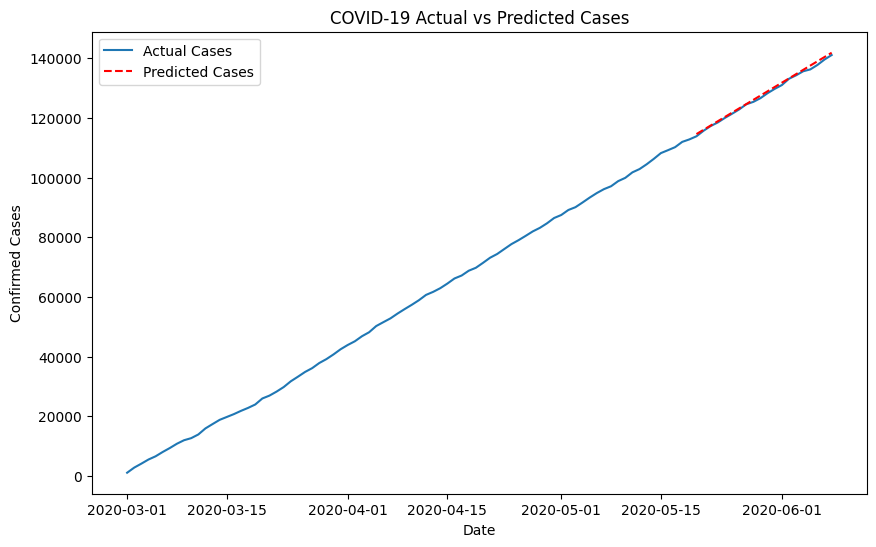

In [52]:
# Step 5: Prepare data
world_data['Days_Since'] = (world_data['Date'] - world_data['Date'].min()).dt.days

X = world_data[['Days_Since']]
y = world_data['Confirmed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 6: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predict & Evaluate
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Step 8: Visualization of predictions
plt.figure(figsize=(10,6))
plt.plot(world_data['Date'], world_data['Confirmed'], label='Actual Cases')
plt.plot(world_data['Date'].iloc[-len(y_test):], y_pred, label='Predicted Cases', linestyle='--', color='red')
plt.title("COVID-19 Actual vs Predicted Cases")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()


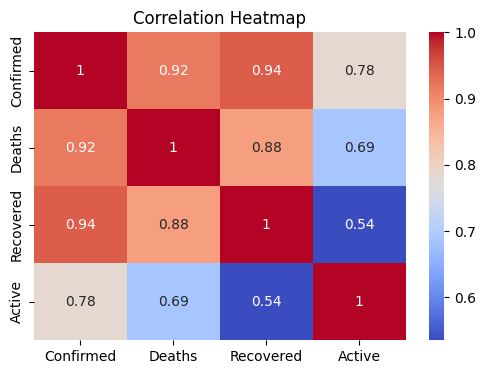

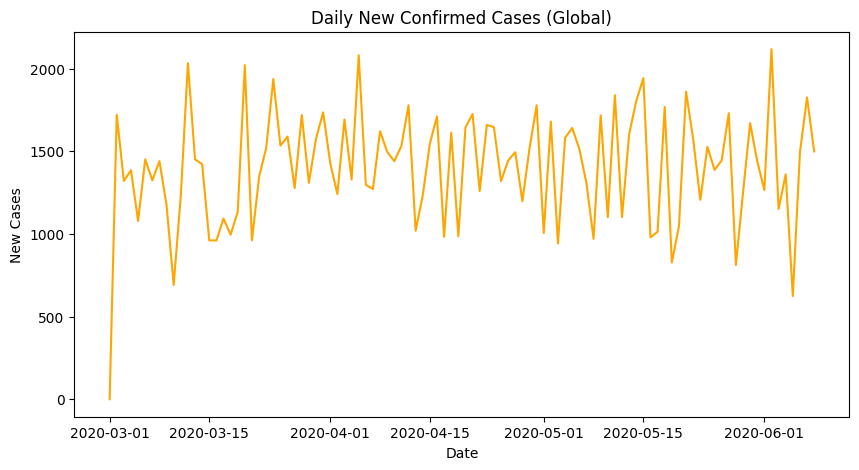

In [53]:
# Correlation heatmap between key numeric features
numeric_cols = ['Confirmed', 'Deaths', 'Recovered', 'Active']
plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Daily new confirmed cases globally
df_sorted = df.sort_values('Date')
world_daily = df_sorted.groupby('Date')['Confirmed'].sum().diff().fillna(0)

plt.figure(figsize=(10,5))
plt.plot(world_daily.index, world_daily.values, color='orange')
plt.title("Daily New Confirmed Cases (Global)")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.show()


R2 Score (Polynomial): 0.9129405745075936
RMSE (Polynomial): 2391.0835804152866


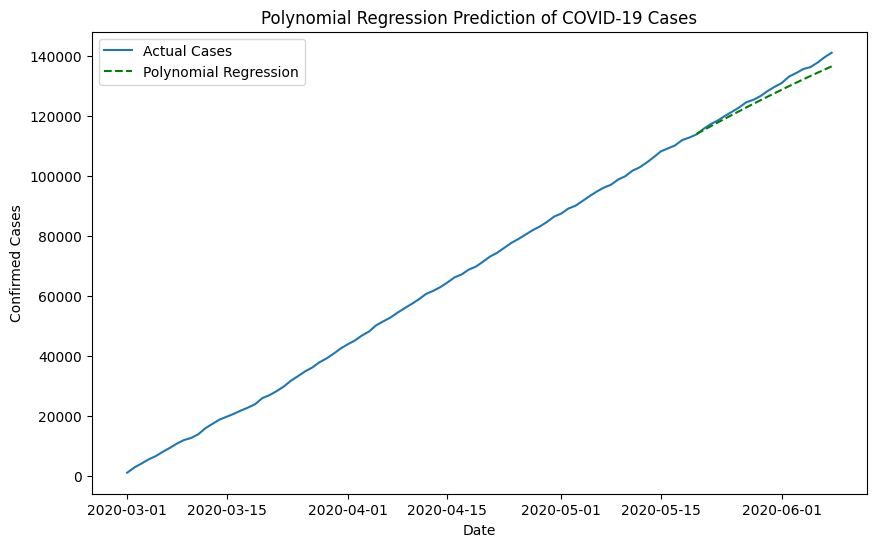

In [54]:
from sklearn.preprocessing import PolynomialFeatures

# Prepare polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Predict
y_poly_pred = poly_model.predict(poly.transform(X_test))

print("R2 Score (Polynomial):", r2_score(y_test, y_poly_pred))
print("RMSE (Polynomial):", np.sqrt(mean_squared_error(y_test, y_poly_pred)))

# Plot comparison
plt.figure(figsize=(10,6))
plt.plot(world_data['Date'], world_data['Confirmed'], label='Actual Cases')
plt.plot(world_data['Date'].iloc[-len(y_test):], y_poly_pred, label='Polynomial Regression', color='green', linestyle='--')
plt.title("Polynomial Regression Prediction of COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()


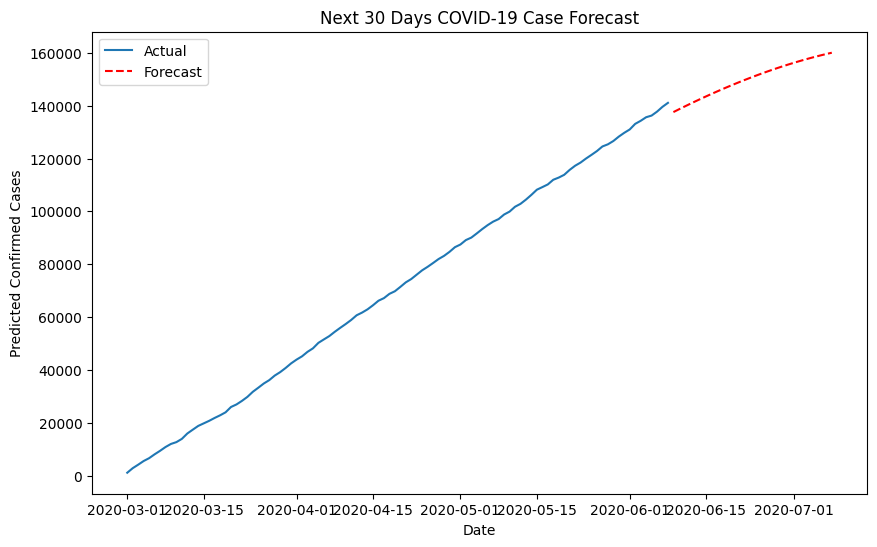

,Days_Since,Predicted_Cases,Date
0,100,137582.086833,2020-06-09
1,101,138615.909414,2020-06-10
2,102,139633.734044,2020-06-11
3,103,140635.280442,2020-06-12
4,104,141620.268329,2020-06-13


In [55]:
# Predict next 30 days
future_days = 30
future = pd.DataFrame({'Days_Since': np.arange(world_data['Days_Since'].max()+1,
                                               world_data['Days_Since'].max()+future_days+1)})

future['Predicted_Cases'] = poly_model.predict(poly.transform(future[['Days_Since']]))
future_dates = pd.date_range(world_data['Date'].max(), periods=future_days+1, freq='D')[1:]
future['Date'] = future_dates

# Plot forecast
plt.figure(figsize=(10,6))
plt.plot(world_data['Date'], world_data['Confirmed'], label='Actual')
plt.plot(future['Date'], future['Predicted_Cases'], label='Forecast', color='red', linestyle='--')
plt.title("Next 30 Days COVID-19 Case Forecast")
plt.xlabel("Date")
plt.ylabel("Predicted Confirmed Cases")
plt.legend()
plt.show()

future.head()


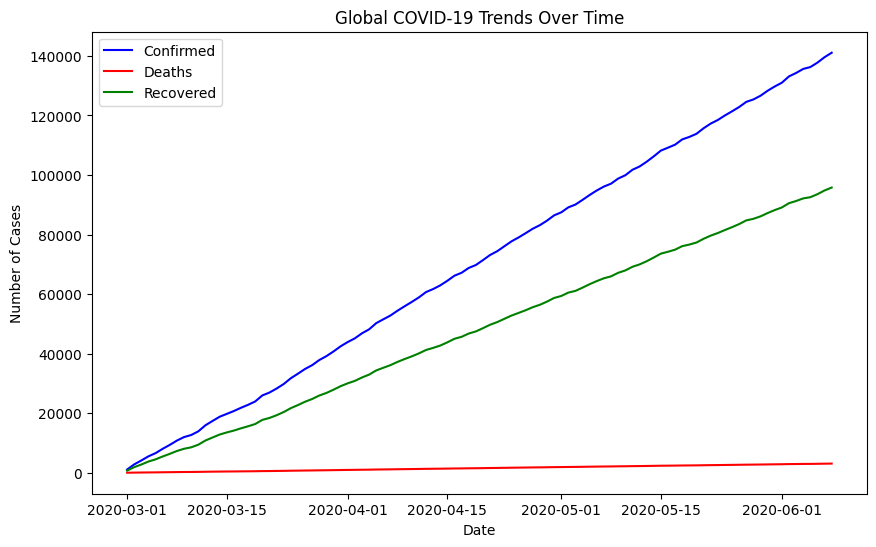

In [56]:
# Global totals per date
world = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(world['Date'], world['Confirmed'], label='Confirmed', color='blue')
plt.plot(world['Date'], world['Deaths'], label='Deaths', color='red')
plt.plot(world['Date'], world['Recovered'], label='Recovered', color='green')
plt.title('Global COVID-19 Trends Over Time')
plt.xlabel('Date'); plt.ylabel('Number of Cases')
plt.legend(); plt.show()


/tmp/ipython-input-4054918256.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")


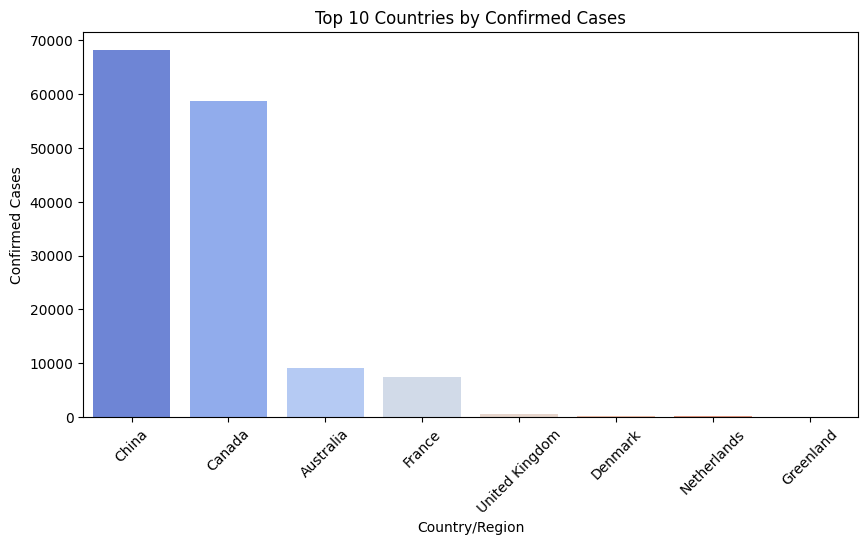

In [31]:
top_countries = df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")
plt.title('Top 10 Countries by Confirmed Cases')
plt.xticks(rotation=45)
plt.ylabel('Confirmed Cases')
plt.show()


In [57]:
import pandas as pd
import numpy as np

dates = pd.date_range(start="2020-03-01", periods=100)
countries = ["Pakistan","United States", "India",  "Russia", "United Kingdom"]

data = []
for country in countries:
    confirmed = np.cumsum(np.random.randint(50, 500, size=100))
    deaths = confirmed * np.random.uniform(0.01, 0.03)
    recovered = confirmed * np.random.uniform(0.5, 0.9)
    active = confirmed - deaths - recovered
    for i in range(100):
        data.append([dates[i], country, int(confirmed[i]), int(deaths[i]), int(recovered[i]), int(active[i])])

df = pd.DataFrame(data, columns=["Date", "Country", "Confirmed", "Deaths", "Recovered", "Active"])
df.to_csv("covid_19_data.csv", index=False)
print("✅ Sample dataset created: covid_data.csv")
df.head()


✅ Sample dataset created: covid_data.csv


,Date,Country,Confirmed,Deaths,Recovered,Active
0,2020-03-01,Pakistan,281,4,237,38
1,2020-03-02,Pakistan,499,7,422,69
2,2020-03-03,Pakistan,924,14,781,127
3,2020-03-04,Pakistan,1047,16,885,144
4,2020-03-05,Pakistan,1333,20,1127,184
